In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

In [2]:
def get_stock_data(tickers, interval='1d', period='1mo'):
    """
    Fetch historical stock data for multiple tickers.
    Args:
        tickers (list): List of stock tickers (e.g., ['AAPL', 'MSFT']).
        interval (str): Data interval ('1d', '1h', etc.).
        period (str): Period to fetch ('1mo', '1y', 'max', etc.).
    Returns:
        dict: Dictionary of DataFrames for each ticker.
    """
    data = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        data[ticker] = stock.history(interval=interval, period=period)
    return data

In [ ]:
def find_extrema(data, column='Close', order=5):
    """
    Find local minima and maxima for a stock.
    Args:
        data (pandas.DataFrame): Stock data with a column to analyze.
        column (str): Column name to find extrema (default is 'Close').
        order (int): Minimum distance between extrema.
    Returns:
        dict: Dictionary with local and global extrema indices and values.
    """
    prices = data[column]
    local_maxima = argrelextrema(prices.values, np.greater, order=order)[0]
    local_minima = argrelextrema(prices.values, np.less, order=order)[0]

    global_max = prices.idxmax()
    global_min = prices.idxmin()
    return {
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'count_maxima': len(local_maxima),
        'count_minima': len(local_minima),
        'global_max': (global_max, prices[global_max]),
        'global_min': (global_min, prices[global_min]),
    }

In [ ]:
def plot_stock_data(data, extrema, ticker, column='Close'):
    """
    Plot stock price data with extrema.
    Args:
        data (pandas.DataFrame): Stock data.
        extrema (dict): Dictionary of extrema indices and values.
        ticker (str): Stock ticker symbol.
        column (str): Column to plot.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data[column], label=f'{ticker} Close Price', color='xkcd:lavender')

    # Map extrema indices to actual dates
    dates = data.index
    local_max_dates = dates[extrema['local_maxima']]
    local_min_dates = dates[extrema['local_minima']]
    
    # Plot local maxima and minima
    plt.scatter(local_max_dates, data[column].iloc[extrema['local_maxima']],
                color='green', label='Local Maxima', marker='^', s=100)
    plt.scatter(local_min_dates, data[column].iloc[extrema['local_minima']],
                color='red', label='Local Minima', marker='v', s=100)

    plt.title(f'{ticker} Stock Price with Local Extrema')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

In [5]:
def analyze_stocks(tickers, interval='1d', period='1mo', order=5):
    """
    Analyze multiple stocks for local minima and maxima.
    Args:
        tickers (list): List of stock tickers to analyze.
        interval (str): Data interval for fetching data.
        period (str): Data period for fetching data.
        order (int): Minimum distance between extrema.
    """
    # Fetch data for all tickers
    stock_data = get_stock_data(tickers, interval, period)
    
    # Analyze each stock
    results = {}
    for ticker, data in stock_data.items():
        extrema = find_extrema(data, order=order)
        results[ticker] = extrema
        print(f"\n{ticker}:")
        print(f"Local Maxima Count: {extrema['count_maxima']}")
        print(f"Local Minima Count: {extrema['count_minima']}")
        
        # Plot the stock data with extrema
        plot_stock_data(data, extrema, ticker)
    
    # Compare local extrema counts
    comparison_df = pd.DataFrame.from_dict(
        {ticker: {'Local Maxima': results[ticker]['count_maxima'],
                  'Local Minima': results[ticker]['count_minima']}
         for ticker in tickers},
        orient='index'
    )
    print("\nComparison of Local Extrema:")
    print(comparison_df)

    # Bar chart for comparison
    comparison_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Comparison of Local Extrema for Stocks')
    plt.xlabel('Stocks')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()



AAPL:
Local Maxima Count: 2
Local Minima Count: 2


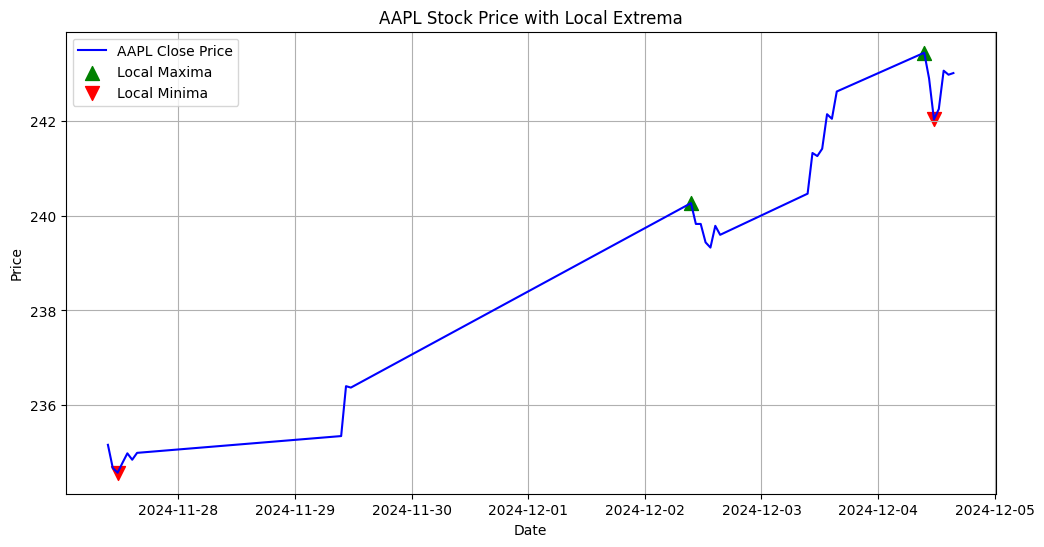


MSFT:
Local Maxima Count: 2
Local Minima Count: 2


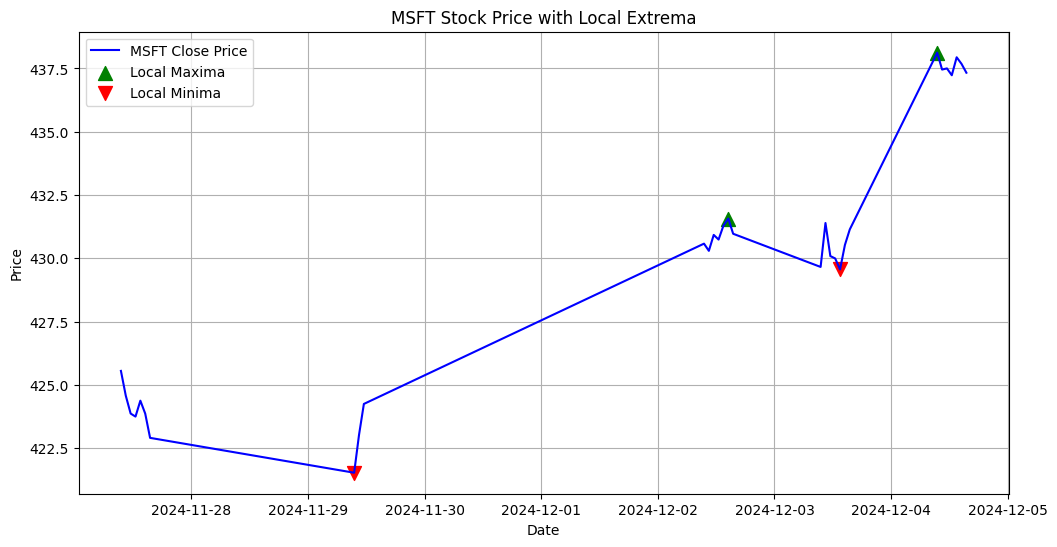


GOOGL:
Local Maxima Count: 3
Local Minima Count: 2


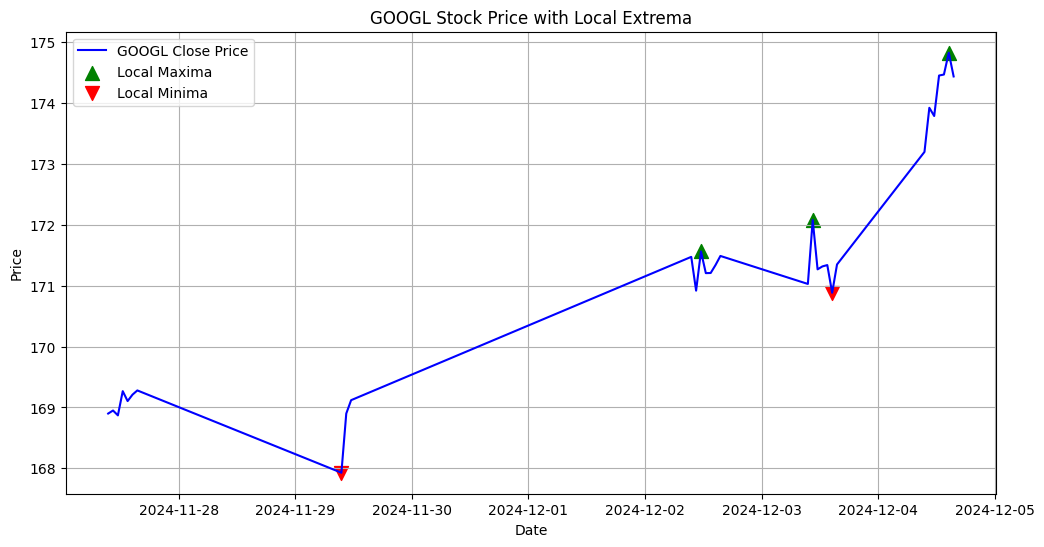


Comparison of Local Extrema:
       Local Maxima  Local Minima
AAPL              2             2
MSFT              2             2
GOOGL             3             2


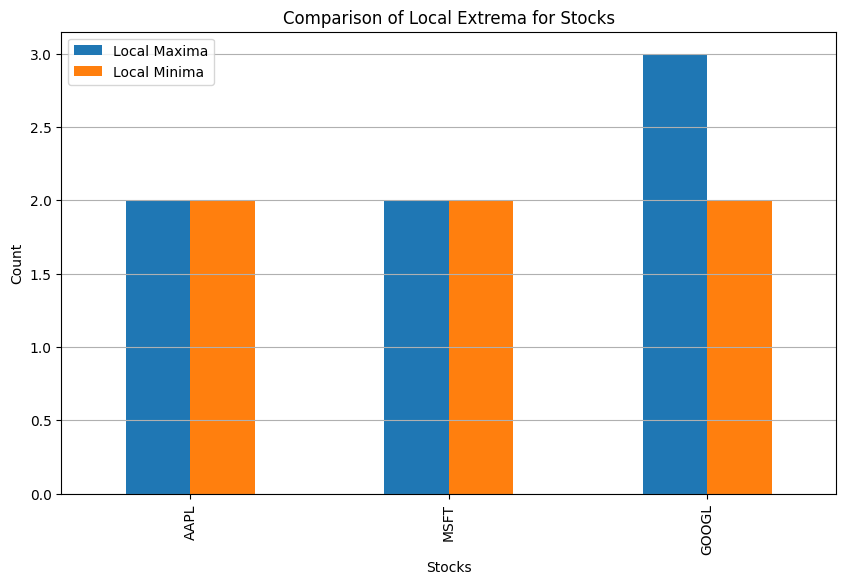

In [6]:
# Example usage
tickers = ['AAPL', 'MSFT', 'GOOGL']  # Add more tickers as needed
analyze_stocks(tickers, interval='1h', period='5d', order=5)